# Get started!

In [1]:
from pathlib import Path
import polars as pl
from ebrec.utils._constants import *
from ebrec.utils._python import compute_npratio, create_lookup_dict

In [2]:
!pip install matplotlib seaborn
!pip install pyarrow
!pip install pandas
!pip install xlsx2csv

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.0/8.0 MB 35.9 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.8/2.8 MB 43.8 MB/s eta 0:00:00
Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.1/3.1 MB 44.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30.7/30.7 M

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker
from matplotlib.ticker import MaxNLocator

## Help functions

In [4]:
EB_COLOR = "#bd1118"


def save_figure(fig, save_path: str = None) -> None:
    if save_path is not None:
        path = Path(save_path)
        path.parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(path, dpi=300)


def plot_histogram(
    df: pl.DataFrame,
    column_name: str = None,
    stat: str = "density",
    save_path: str = None,
    x_max: int = None,
    y_max: int = None,
    binwidth: int = None,
    num_xticks: int = None,
    num_yticks: int = None,
    fontsize: int = 12,
    bins: int = "auto",
) -> None:
    # =>
    fig, ax = plt.subplots(figsize=(18, 14))
    sns.set_theme(style="whitegrid", font_scale=fontsize / 12)
    sns.histplot(
        data=df,
        x=column_name,
        color=EB_COLOR,
        binwidth=binwidth,
        alpha=0.5,
        stat=stat,
        bins=bins,
    )
    if x_max is not None:
        ax.set_xlim([0, x_max])
    if y_max is not None:
        ax.set_ylim([0, y_max])
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=num_xticks))
    if num_yticks is not None:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=num_yticks, prune="lower"))

    plt.grid(axis="x")
    plt.title("")
    plt.xlabel("")
    plt.ylabel(stat.capitalize())
    plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
    plt.tight_layout()
    save_figure(fig, save_path=save_path)
    plt.show()


def create_bar_plot(
    df: pd.DataFrame,
    x_col: str,
    y_col: str,
    xlabel: str = "",
    ylabel: str = "",
    title: str = None,
    rotation: int = 0,
    fontsize: int = 12,
    colors: list[str] = None,
    y_as_percentage: bool = False,
    y_max: float = None,
    save_path: str = None,
):
    # Set style
    sns.set_theme(style="whitegrid", font_scale=fontsize / 12)
    # Create bar plot
    fig, ax = plt.subplots(figsize=(18, 14))
    ax = sns.barplot(
        data=df,
        x=x_col,
        y=y_col,
        alpha=0.80,
        palette=colors,
        legend=False,
        hue=x_col,
    )
    if y_as_percentage:
        # Format y-axis labels as percentage
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))
    if y_max is not None:
        ax.set_ylim([0, y_max])
    if title:
        plt.title(title)

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)

    # Remove top and right borders
    # sns.despine()
    plt.tight_layout()
    save_figure(fig, save_path=save_path)
    plt.show()


def create_plot(
    x,
    xlabel: str = "",
    ylabel: str = "",
    title: str = None,
    rotation: int = 0,
    marker: str = "",
    linestyle: str = "-",
    fontsize: int = 12,
    markersize: float = 2.0,
    linewidth: float = 2.0,
    color: str = None,
    y_as_percentage: bool = False,
    y_max: float = None,
    x_max: float = None,
    num_xticks: int = None,
    num_yticks: int = None,
    save_path: str = None,
):
    fig, ax = plt.subplots(figsize=(18, 14))
    plt.plot(
        x,
        linewidth=linewidth,
        color=color,
        marker=marker,
        markersize=markersize,
        linestyle=linestyle,
    )
    if y_as_percentage:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))
    else:
        ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
    if y_max is not None:
        ax.set_ylim([0, y_max])
    if x_max is not None:
        ax.set_xlim([0, x_max])
    if title:
        ax.set_title(title, fontsize=fontsize)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=num_xticks))
    if num_yticks is not None:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=num_yticks, prune="lower"))

    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.tick_params(axis="x", labelsize=fontsize)
    ax.tick_params(axis="y", labelsize=fontsize)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    save_figure(fig, save_path=save_path)
    plt.show()


def add_word_count_column(
    df: pl.DataFrame, column: str, column_alias: str
) -> pl.DataFrame:
    return df.with_columns(
        pl.when(pl.col(column) != "")
        .then(pl.col(column).str.split(by=" ").list.len())
        .otherwise(0)
        .alias(column_alias)
    )

----
# Load dataset

In [5]:
PATH = Path("~/ebnerd_data")
TRAIN_VAL_SPLIT = f"ebnerd_large"  # [ebnerd_demo, ebnerd_small, ebnerd_large]
TEST_SPLIT = f"ebnerd_testset"  # "ebnerd_testset", "ebnerd_testset_gt"

df_behaviors_train = df_behaviors = pl.scan_parquet(
    PATH.joinpath(TRAIN_VAL_SPLIT, "train", "behaviors.parquet")
)
df_history_train = df_behaviors = pl.scan_parquet(
    PATH.joinpath(TRAIN_VAL_SPLIT, "train", "history.parquet")
)
df_behaviors_val = df_behaviors = pl.scan_parquet(
    PATH.joinpath(TRAIN_VAL_SPLIT, "validation", "behaviors.parquet")
)
df_history_val = df_behaviors = pl.scan_parquet(
    PATH.joinpath(TRAIN_VAL_SPLIT, "validation", "history.parquet")
)
df_behaviors_test = df_behaviors = (
    pl.scan_parquet(PATH.joinpath(TEST_SPLIT, "test", "behaviors.parquet"))
    .filter(~pl.col(DEFAULT_IS_BEYOND_ACCURACY_COL))
    .drop(DEFAULT_IS_BEYOND_ACCURACY_COL)
)
df_history_test = df_behaviors = pl.scan_parquet(
    PATH.joinpath(TEST_SPLIT, "test", "history.parquet")
)
df_behaviors_test_ba = df_behaviors = pl.scan_parquet(
    PATH.joinpath(TEST_SPLIT, "test", "behaviors.parquet")
).filter(pl.col(DEFAULT_IS_BEYOND_ACCURACY_COL))
df_articles = pl.scan_parquet(PATH.joinpath("articles.parquet")).collect()

PLOT_PATH = Path("plot")

## Define some help names

In [6]:
N_INVIEW_ARTICLES = "inview_len"
N_WORDS_TITLE = "title_len"
N_WORDS_SUBTITLE = "subtitle_len"
N_WORDS_BODY = "body_len"
CATEGORY_DIST_NAME = "category_distribution"
FONTSIZE = 90

## Concat datasets

In [7]:
if DEFAULT_CLICKED_ARTICLES_COL not in df_behaviors_test.columns:
    df_behaviors_test = df_behaviors_test.with_columns(
        pl.Series(DEFAULT_CLICKED_ARTICLES_COL, [[0]], dtype=pl.List(pl.Int32))
    )

df_behaviors = pl.concat(
    [df_behaviors_train, df_behaviors_val, df_behaviors_test]
).with_columns(pl.col(DEFAULT_INVIEW_ARTICLES_COL).list.len().alias(N_INVIEW_ARTICLES))

df_history = pl.concat([df_history_train, df_history_val, df_history_test])

In [8]:
TIME_HIST_COL = "impression_time_fixed"
df_history_unique_hist_interactions = (
    df_history.select(DEFAULT_USER_COL, pl.col(TIME_HIST_COL))
    .explode(TIME_HIST_COL)
    .group_by(DEFAULT_USER_COL)
    .agg(pl.col(TIME_HIST_COL).unique())
    .collect()
)

In [9]:
df_articles = (
    df_articles.pipe(add_word_count_column, column="title", column_alias=N_WORDS_TITLE)
    .pipe(add_word_count_column, column="subtitle", column_alias=N_WORDS_SUBTITLE)
    .pipe(add_word_count_column, column="body", column_alias=N_WORDS_BODY)
)

# Dataset overview:

## Behaviors Train/Val:

In [10]:
print(df_behaviors_train.columns)
df_behaviors_train.head(2).collect()

['impression_id', 'article_id', 'impression_time', 'read_time', 'scroll_percentage', 'device_type', 'article_ids_inview', 'article_ids_clicked', 'user_id', 'is_sso_user', 'gender', 'postcode', 'age', 'is_subscriber', 'session_id', 'next_read_time', 'next_scroll_percentage']


shape: (2, 17)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ impressio ‚îÜ article_i ‚îÜ impressio ‚îÜ read_time ‚îÜ ‚Ä¶ ‚îÜ is_subscr ‚îÜ session_i ‚îÜ next_read ‚îÜ next_scr ‚îÇ
‚îÇ n_id      ‚îÜ d         ‚îÜ n_time    ‚îÜ ---       ‚îÜ   ‚îÜ iber      ‚îÜ d         ‚îÜ _time     ‚îÜ oll_perc ‚îÇ
‚îÇ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ f32       ‚îÜ   ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ entage   ‚îÇ
‚îÇ u32       ‚îÜ i32       ‚îÜ datetime[ ‚îÜ           ‚îÜ   ‚îÜ bool      ‚îÜ u32       ‚îÜ f32       ‚îÜ ---      ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ Œºs]       ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ f32      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 47727     ‚îÜ null      ‚îÜ 2023-05-2 ‚îÜ 20.0      ‚îÜ ‚Ä¶ ‚îÜ false     ‚îÜ 265       ‚îÜ 34.0      ‚îÜ 100.0    ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ 1         ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ 21:35:07  ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îÇ 47731     ‚îÜ null      ‚îÜ 2023-05-2 ‚îÜ 13.0      ‚îÜ ‚Ä¶ ‚îÜ false     ‚îÜ 265       ‚îÜ 45.0      ‚îÜ 100.0    ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ 1         ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ 21:32:33  ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [11]:
df_history.head(2).collect()

shape: (2, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ user_id ‚îÜ impression_time_fixe ‚îÜ scroll_percentage_f ‚îÜ article_id_fixed    ‚îÜ read_time_fixed     ‚îÇ
‚îÇ ---     ‚îÜ d                    ‚îÜ ixed                ‚îÜ ---                 ‚îÜ ---                 ‚îÇ
‚îÇ u32     ‚îÜ ---                  ‚îÜ ---                 ‚îÜ list[i32]           ‚îÜ list[f32]           ‚îÇ
‚îÇ         ‚îÜ list[datetime[Œºs]]   ‚îÜ list[f32]           ‚îÜ                     ‚îÜ                     ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 10029   ‚îÜ [2023-04-28          ‚îÜ [23.0, 69.0, ‚Ä¶      ‚îÜ [9735579, 9739888,  ‚îÜ [28.0, 24.0, ‚Ä¶ 0.0] ‚îÇ
‚îÇ         ‚îÜ 06:16:57,            ‚îÜ null]               ‚îÜ ‚Ä¶ 9770541]          ‚îÜ                     ‚îÇ
‚îÇ         ‚îÜ 2023-04-28‚Ä¶          ‚îÜ                     ‚îÜ                     ‚îÜ                     ‚îÇ
‚îÇ 10033   ‚îÜ [2023-04-27          ‚îÜ [33.0, 41.0, ‚Ä¶      ‚îÜ [9738139, 9738263,  ‚îÜ [2.0, 2.0, ‚Ä¶ 1.0]   ‚îÇ
‚îÇ         ‚îÜ 11:11:32,            ‚îÜ 29.0]               ‚îÜ ‚Ä¶ 9769404]          ‚îÜ                     ‚îÇ
‚îÇ         ‚îÜ 2023-04-27‚Ä¶          ‚îÜ                     ‚îÜ                     ‚îÜ                     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

## Articles:

In [12]:
print(df_articles.columns)
df_articles.head(2)

['article_id', 'title', 'subtitle', 'last_modified_time', 'premium', 'body', 'published_time', 'image_ids', 'article_type', 'url', 'ner_clusters', 'entity_groups', 'topics', 'category', 'subcategory', 'category_str', 'total_inviews', 'total_pageviews', 'total_read_time', 'sentiment_score', 'sentiment_label', 'title_len', 'subtitle_len', 'body_len']


shape: (2, 24)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ article_i ‚îÜ title     ‚îÜ subtitle  ‚îÜ last_modi ‚îÜ ‚Ä¶ ‚îÜ sentiment ‚îÜ title_len ‚îÜ subtitle_ ‚îÜ body_len ‚îÇ
‚îÇ d         ‚îÜ ---       ‚îÜ ---       ‚îÜ fied_time ‚îÜ   ‚îÜ _label    ‚îÜ ---       ‚îÜ len       ‚îÜ ---      ‚îÇ
‚îÇ ---       ‚îÜ str       ‚îÜ str       ‚îÜ ---       ‚îÜ   ‚îÜ ---       ‚îÜ u32       ‚îÜ ---       ‚îÜ u32      ‚îÇ
‚îÇ i32       ‚îÜ           ‚îÜ           ‚îÜ datetime[ ‚îÜ   ‚îÜ str       ‚îÜ           ‚îÜ u32       ‚îÜ          ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ           ‚îÜ Œºs]       ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 3000022   ‚îÜ Hanks     ‚îÜ Tom Hanks ‚îÜ 2023-06-2 ‚îÜ ‚Ä¶ ‚îÜ Negative  ‚îÜ 4         ‚îÜ 16        ‚îÜ 119      ‚îÇ
‚îÇ           ‚îÜ beskyldt  ‚îÜ har angiv ‚îÜ 9         ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îÇ           ‚îÜ for misha ‚îÜ eligt     ‚îÜ 06:20:32  ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îÇ           ‚îÜ ndling    ‚îÜ mishand‚Ä¶  ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îÇ 3000063   ‚îÜ Bostrups  ‚îÜ Studiev√¶r ‚îÜ 2023-06-2 ‚îÜ ‚Ä¶ ‚îÜ Neutral   ‚îÜ 5         ‚îÜ 6         ‚îÜ 388      ‚îÇ
‚îÇ           ‚îÜ aske      ‚îÜ ten blev  ‚îÜ 9         ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îÇ           ‚îÜ spredt i  ‚îÜ mindet    ‚îÜ 06:20:32  ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îÇ           ‚îÜ Fures√∏en  ‚îÜ med gla‚Ä¶  ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

## More descriptive:

In [13]:
n_pos = (
    df_behaviors.select(pl.col(DEFAULT_CLICKED_ARTICLES_COL).list.len()).sum().collect()
)[DEFAULT_CLICKED_ARTICLES_COL][0]
n_neg = (
    df_behaviors.select(
        pl.col(DEFAULT_INVIEW_ARTICLES_COL).list.len()
        - pl.col(DEFAULT_CLICKED_ARTICLES_COL).list.len()
    )
    .sum()
    .collect()
)[DEFAULT_INVIEW_ARTICLES_COL][0]

n_samples_in_history = df_history_unique_hist_interactions.select(
    pl.col(TIME_HIST_COL).list.len()
).sum()[TIME_HIST_COL][0]

n_impressions = df_behaviors.select(DEFAULT_USER_COL).collect().shape[0]

n_users = df_behaviors.select(DEFAULT_USER_COL).unique().collect().shape[0]
n_sso_users = (
    df_behaviors.select(DEFAULT_USER_COL, DEFAULT_IS_SSO_USER_COL)
    .unique()
    .select(pl.col(DEFAULT_IS_SSO_USER_COL))
    .sum()
    .collect()[DEFAULT_IS_SSO_USER_COL][0]
)
n_subscriber_users = (
    df_behaviors.select(DEFAULT_USER_COL, DEFAULT_IS_SUBSCRIBER_COL)
    .unique()
    .sum()
    .collect()[DEFAULT_IS_SUBSCRIBER_COL][0]
)
n_articles = df_articles.select(DEFAULT_ARTICLE_ID_COL).unique().shape[0]
n_categories = df_articles.select(DEFAULT_CATEGORY_COL).unique().shape[0]
n_subcategories = (
    df_articles.select(pl.col(DEFAULT_SUBCATEGORY_COL).explode()).unique().shape[0]
)

descriptive_dict = {
    f"# News": n_articles,
    f"# Users (unique)": n_users,
    f"# News categories": n_categories,
    f"# Impressions": n_impressions,
    f"# History Interactions": n_samples_in_history,
    f"# Total dataset interactions (Impressions + History)": n_impressions
    + n_samples_in_history,
    f"# News subcategories": n_subcategories,
    f"# Positive": n_pos,
    f"# Negative": n_neg,
    f"NP-ratio": round(compute_npratio(n_pos=n_pos, n_neg=n_neg), 2),
    f"Avg. impression per user": round(n_impressions / n_users, 2),
    f"Avg. title len. (words)": round(
        df_articles.select(pl.col(N_WORDS_TITLE)).mean()[N_WORDS_TITLE][0], 2
    ),
    f"Std. title len. (words)": round(
        df_articles.select(pl.col(N_WORDS_TITLE)).std()[N_WORDS_TITLE][0], 2
    ),
    f"Avg. abstract len. (words)": round(
        df_articles.select(pl.col(N_WORDS_SUBTITLE)).mean()[N_WORDS_SUBTITLE][0],
        2,
    ),
    f"Std. abstract len. (words)": round(
        df_articles.select(pl.col(N_WORDS_SUBTITLE)).std()[N_WORDS_SUBTITLE][0],
        2,
    ),
    f"Avg. body len. (words)": round(
        df_articles.select(pl.col(N_WORDS_BODY)).mean()[N_WORDS_BODY][0],
        2,
    ),
    f"Std. body len. (words)": round(
        df_articles.select(pl.col(N_WORDS_BODY)).std()[N_WORDS_BODY][0],
        2,
    ),
    f"# SSO users": n_sso_users,
    f"# Subscriber users": n_subscriber_users,
}
_ = [print(f"{key}: {value}") for key, value in descriptive_dict.items()]

# News: 125541
# Users (unique): 1103602
# News categories: 32
# Impressions: 37966985
# History Interactions: 213360945
# Total dataset interactions (Impressions + History): 251327930
# News subcategories: 263
# Positive: 38120389
# Negative: 401844989
NP-ratio: 10.54
Avg. impression per user: 34.4
Avg. title len. (words): 6.6
Std. title len. (words): 2.5
Avg. abstract len. (words): 17.3
Std. abstract len. (words): 8.64
Avg. body len. (words): 363.23
Std. body len. (words): 306.17
# SSO users: 56823
# Subscriber users: 27200


In [14]:
def compute_overlap(df1, df2):
    df_concat = pl.concat([df1, df2]).unique().shape[0]
    return df1.shape[0] / df_concat


users_train = df_behaviors_train.select(pl.col(DEFAULT_USER_COL).unique()).collect()
users_valid = df_behaviors_val.select(pl.col(DEFAULT_USER_COL).unique()).collect()
users_test = df_behaviors_test.select(pl.col(DEFAULT_USER_COL).unique()).collect()
train_val, train_test, val_test, train_ValTest, val_TrainTest, test_TrainVal = (
    compute_overlap(users_train, users_valid),
    compute_overlap(users_train, users_test),
    compute_overlap(users_valid, users_test),
    compute_overlap(users_train, pl.concat([users_valid, users_test]).unique()),
    compute_overlap(users_valid, pl.concat([users_train, users_test]).unique()),
    compute_overlap(users_test, pl.concat([users_train, users_valid]).unique()),
)
print(f"Train-Val overlap: {round(train_val*100,2)}%")
print(f"Train-Test overlap: {round(train_test*100, 2)}%")
print(f"Val-Test overlap: {round(val_test*100, 2)}%")
print(f"Train-(Val+Test) overlap: {round(train_ValTest*100, 2)}%")
print(f"Val-(Train+Test) overlap: {round(val_TrainTest*100, 2)}%")
print(f"Test-(Train+Val) overlap: {round(test_TrainVal*100, 2)}%")

Train-Val overlap: 80.85%
Train-Test overlap: 76.77%
Val-Test overlap: 82.46%
Train-(Val+Test) overlap: 71.41%
Val-(Train+Test) overlap: 71.73%
Test-(Train+Val) overlap: 73.19%


In [15]:
gender_total = (
    df_behaviors.select(DEFAULT_USER_COL, DEFAULT_GENDER_COL)
    .drop_nulls()
    .group_by(DEFAULT_USER_COL)
    .agg(pl.col(DEFAULT_GENDER_COL).first())
    .collect()
)
m_total = gender_total.filter(pl.col(DEFAULT_GENDER_COL) == 0).shape[0]
w_total = gender_total.filter(pl.col(DEFAULT_GENDER_COL) == 1).shape[0]
m_w_total = m_total + w_total
print(
    f"Users with 'gender' in total dataset: {m_w_total}, where {m_total} are men ({round(m_total/m_w_total*100, 2)}%) and {w_total} are women ({round(w_total/m_w_total*100, 2)}%)"
)
gender_ba = (
    df_behaviors_test_ba.select(
        DEFAULT_USER_COL, DEFAULT_GENDER_COL, DEFAULT_IS_BEYOND_ACCURACY_COL
    )
    .drop_nulls()
    .group_by(DEFAULT_USER_COL)
    .agg(pl.col(DEFAULT_GENDER_COL).first())
    .collect()
)
m_ba = gender_ba.filter(pl.col(DEFAULT_GENDER_COL) == 0).shape[0]
w_ba = gender_ba.filter(pl.col(DEFAULT_GENDER_COL) == 1).shape[0]
m_w_ba = m_ba + w_ba
print(
    f"Users with 'gender' in beyond-accuracy dataset: {m_w_ba}, where {m_ba} are men ({round(m_ba/m_w_ba*100, 2)}%) and {w_ba} are women ({round(w_ba/m_w_ba*100, 2)}%)"
)

Users with 'gender' in total dataset: 37023, where 31240 are men (84.38%) and 5783 are women (15.62%)
Users with 'gender' in beyond-accuracy dataset: 33434, where 28404 are men (84.96%) and 5030 are women (15.04%)


-----
# Visualizations:

## Textual features in Articles:

### Title

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ value    ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÇ
‚îÇ str        ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 125541.0 ‚îÇ
‚îÇ null_count ‚îÜ 0.0      ‚îÇ
‚îÇ mean       ‚îÜ 6.601636 ‚îÇ
‚îÇ std        ‚îÜ 2.496316 ‚îÇ
‚îÇ min        ‚îÜ 0.0      ‚îÇ
‚îÇ 25%        ‚îÜ 5.0      ‚îÇ
‚îÇ 50%        ‚îÜ 6.0      ‚îÇ
‚îÇ 75%        ‚îÜ 8.0      ‚îÇ
‚îÇ max        ‚îÜ 27.0     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


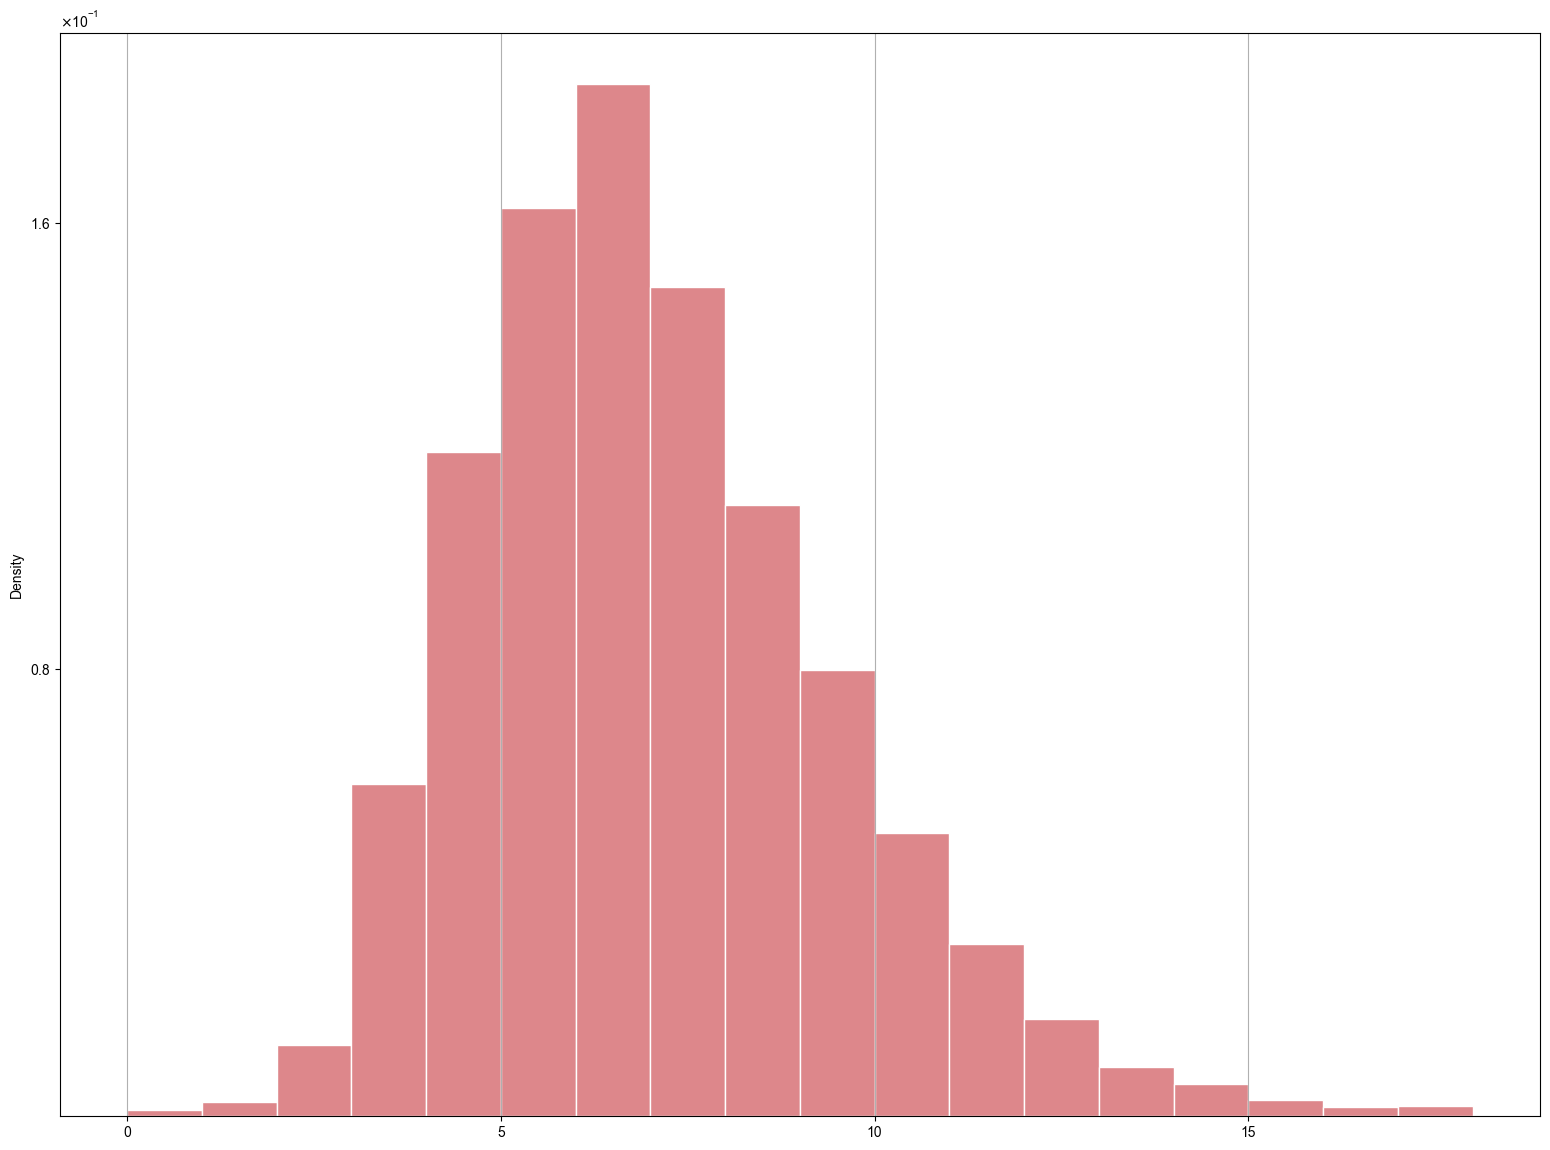

In [16]:
#
print(df_articles[N_WORDS_TITLE].describe())
plot_histogram(
    df_articles.filter(pl.col(N_WORDS_TITLE) <= 18).select(N_WORDS_TITLE),
    num_xticks=4,
    num_yticks=3,
    fontsize=FONTSIZE,
    binwidth=1,
    column_name=N_WORDS_TITLE,
    save_path=PLOT_PATH.joinpath(N_WORDS_TITLE + ".png"),
)

### Subtitle

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ value     ‚îÇ
‚îÇ ---        ‚îÜ ---       ‚îÇ
‚îÇ str        ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 125541.0  ‚îÇ
‚îÇ null_count ‚îÜ 0.0       ‚îÇ
‚îÇ mean       ‚îÜ 17.301607 ‚îÇ
‚îÇ std        ‚îÜ 8.643949  ‚îÇ
‚îÇ min        ‚îÜ 0.0       ‚îÇ
‚îÇ 25%        ‚îÜ 13.0      ‚îÇ
‚îÇ 50%        ‚îÜ 17.0      ‚îÇ
‚îÇ 75%        ‚îÜ 22.0      ‚îÇ
‚îÇ max        ‚îÜ 157.0     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


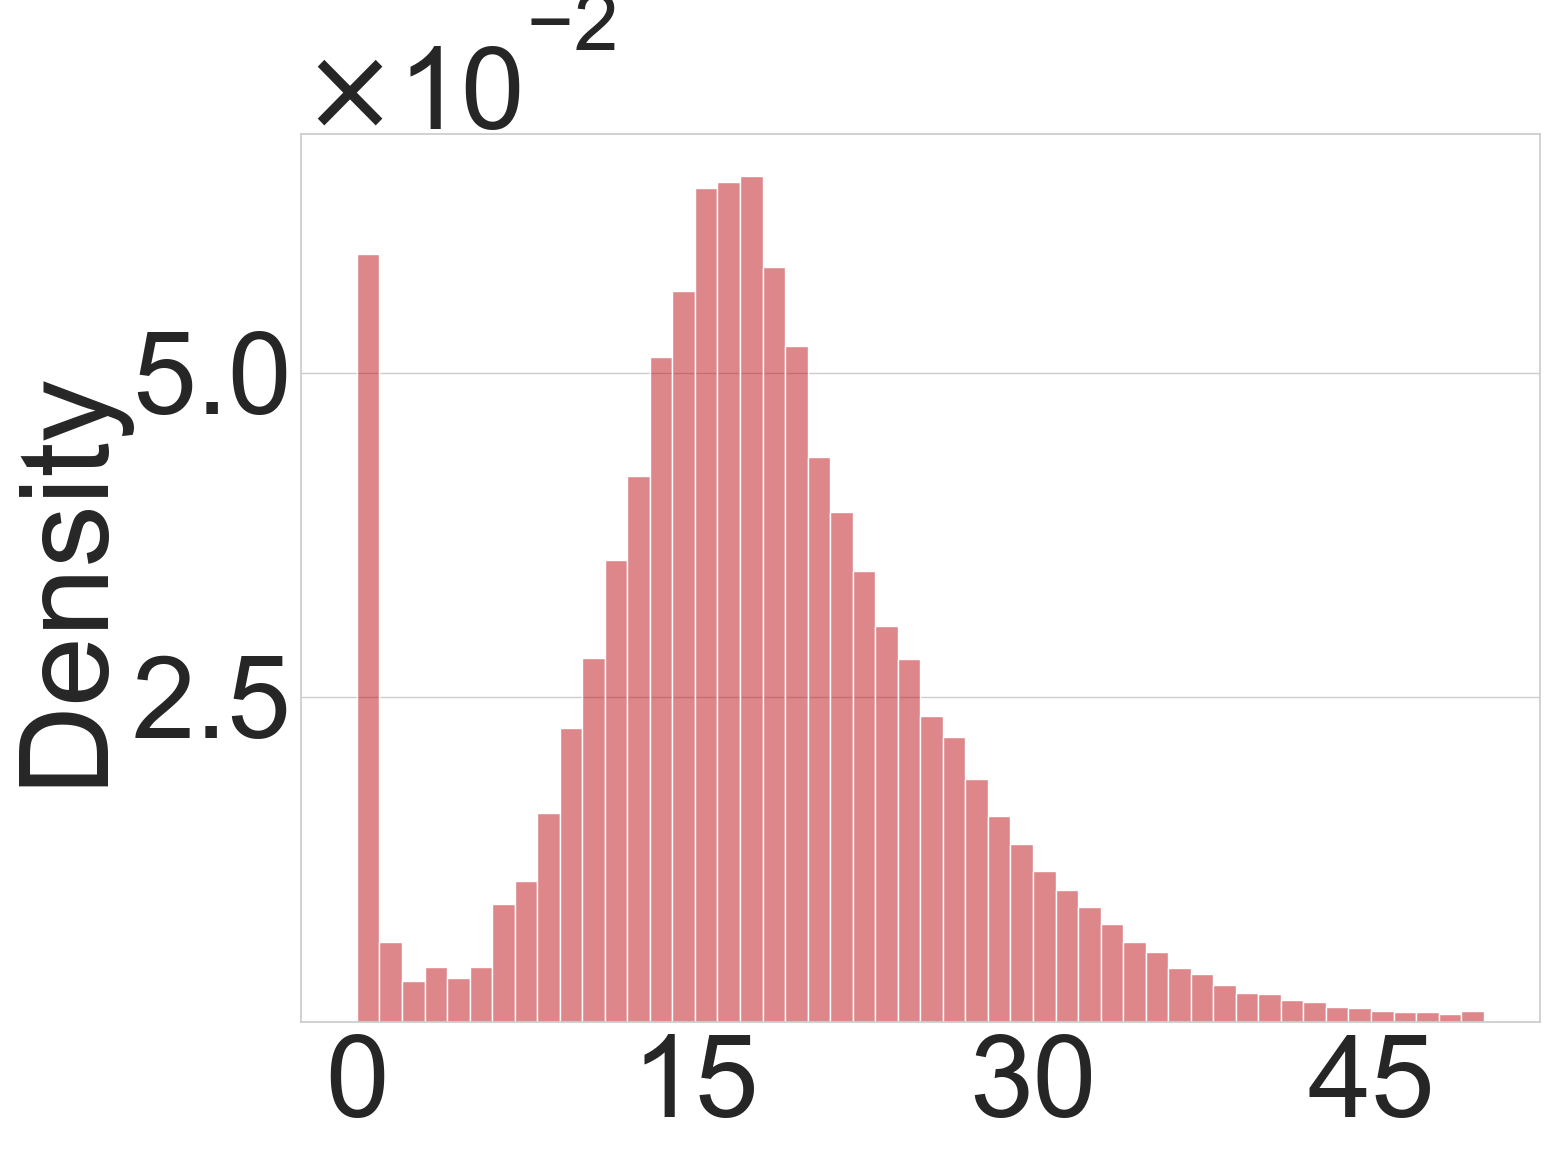

In [17]:
print(df_articles[N_WORDS_SUBTITLE].describe())
plot_histogram(
    df_articles.filter(pl.col(N_WORDS_SUBTITLE) <= 50).select(N_WORDS_SUBTITLE),
    num_xticks=4,
    num_yticks=3,
    fontsize=FONTSIZE,
    binwidth=1,
    column_name=N_WORDS_SUBTITLE,
    save_path=PLOT_PATH.joinpath(N_WORDS_SUBTITLE + ".png"),
)

### Body

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ value      ‚îÇ
‚îÇ ---        ‚îÜ ---        ‚îÇ
‚îÇ str        ‚îÜ f64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 125541.0   ‚îÇ
‚îÇ null_count ‚îÜ 0.0        ‚îÇ
‚îÇ mean       ‚îÜ 363.231175 ‚îÇ
‚îÇ std        ‚îÜ 306.16982  ‚îÇ
‚îÇ min        ‚îÜ 0.0        ‚îÇ
‚îÇ 25%        ‚îÜ 195.0      ‚îÇ
‚îÇ 50%        ‚îÜ 295.0      ‚îÇ
‚îÇ 75%        ‚îÜ 451.0      ‚îÇ
‚îÇ max        ‚îÜ 10482.0    ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


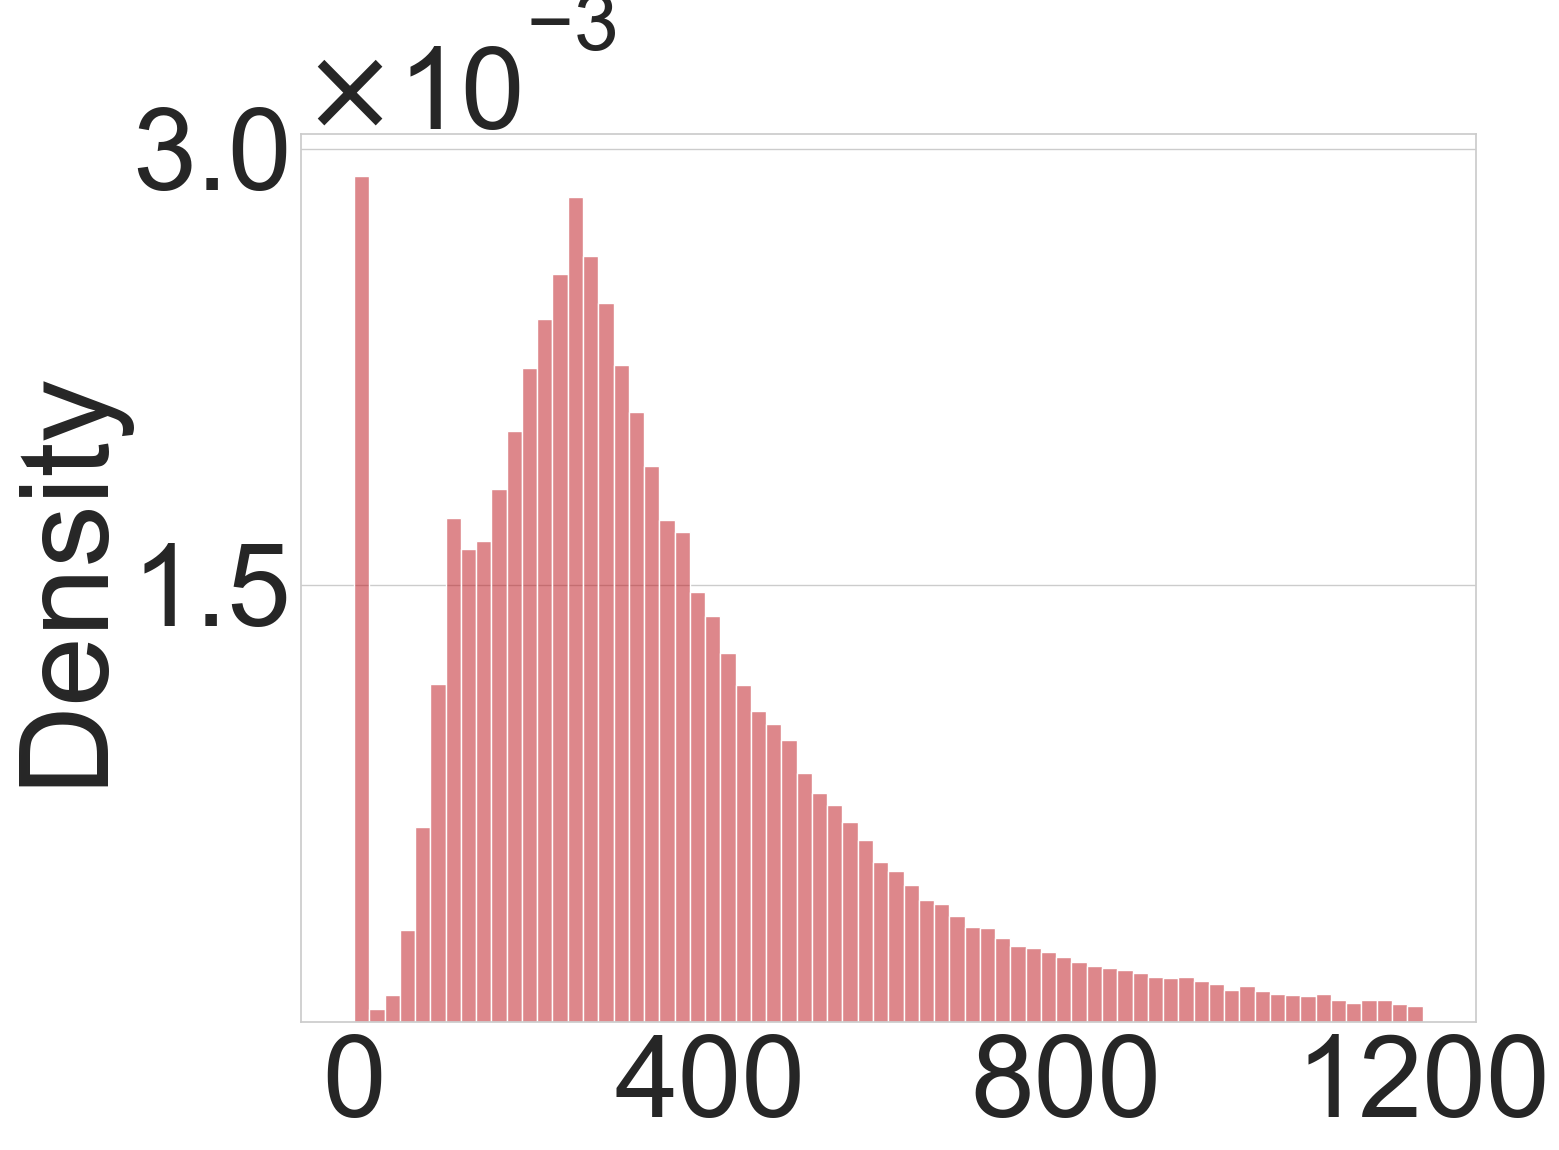

In [18]:
print(df_articles[N_WORDS_BODY].describe())
plot_histogram(
    df_articles.filter(pl.col(N_WORDS_BODY) <= 1200).select(N_WORDS_BODY),
    num_xticks=4,
    num_yticks=3,
    fontsize=FONTSIZE,
    bins=70,
    binwidth=None,
    column_name=N_WORDS_BODY,
    save_path=PLOT_PATH.joinpath(N_WORDS_BODY + ".png"),
)

## Number of in-view articles per impression

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ inview_len  ‚îÇ
‚îÇ ---        ‚îÜ ---         ‚îÇ
‚îÇ str        ‚îÜ f64         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 3.7966985e7 ‚îÇ
‚îÇ null_count ‚îÜ 0.0         ‚îÇ
‚îÇ mean       ‚îÜ 11.588104   ‚îÇ
‚îÇ std        ‚îÜ 8.627814    ‚îÇ
‚îÇ min        ‚îÜ 5.0         ‚îÇ
‚îÇ 25%        ‚îÜ 6.0         ‚îÇ
‚îÇ 50%        ‚îÜ 9.0         ‚îÇ
‚îÇ 75%        ‚îÜ 14.0        ‚îÇ
‚îÇ max        ‚îÜ 100.0       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


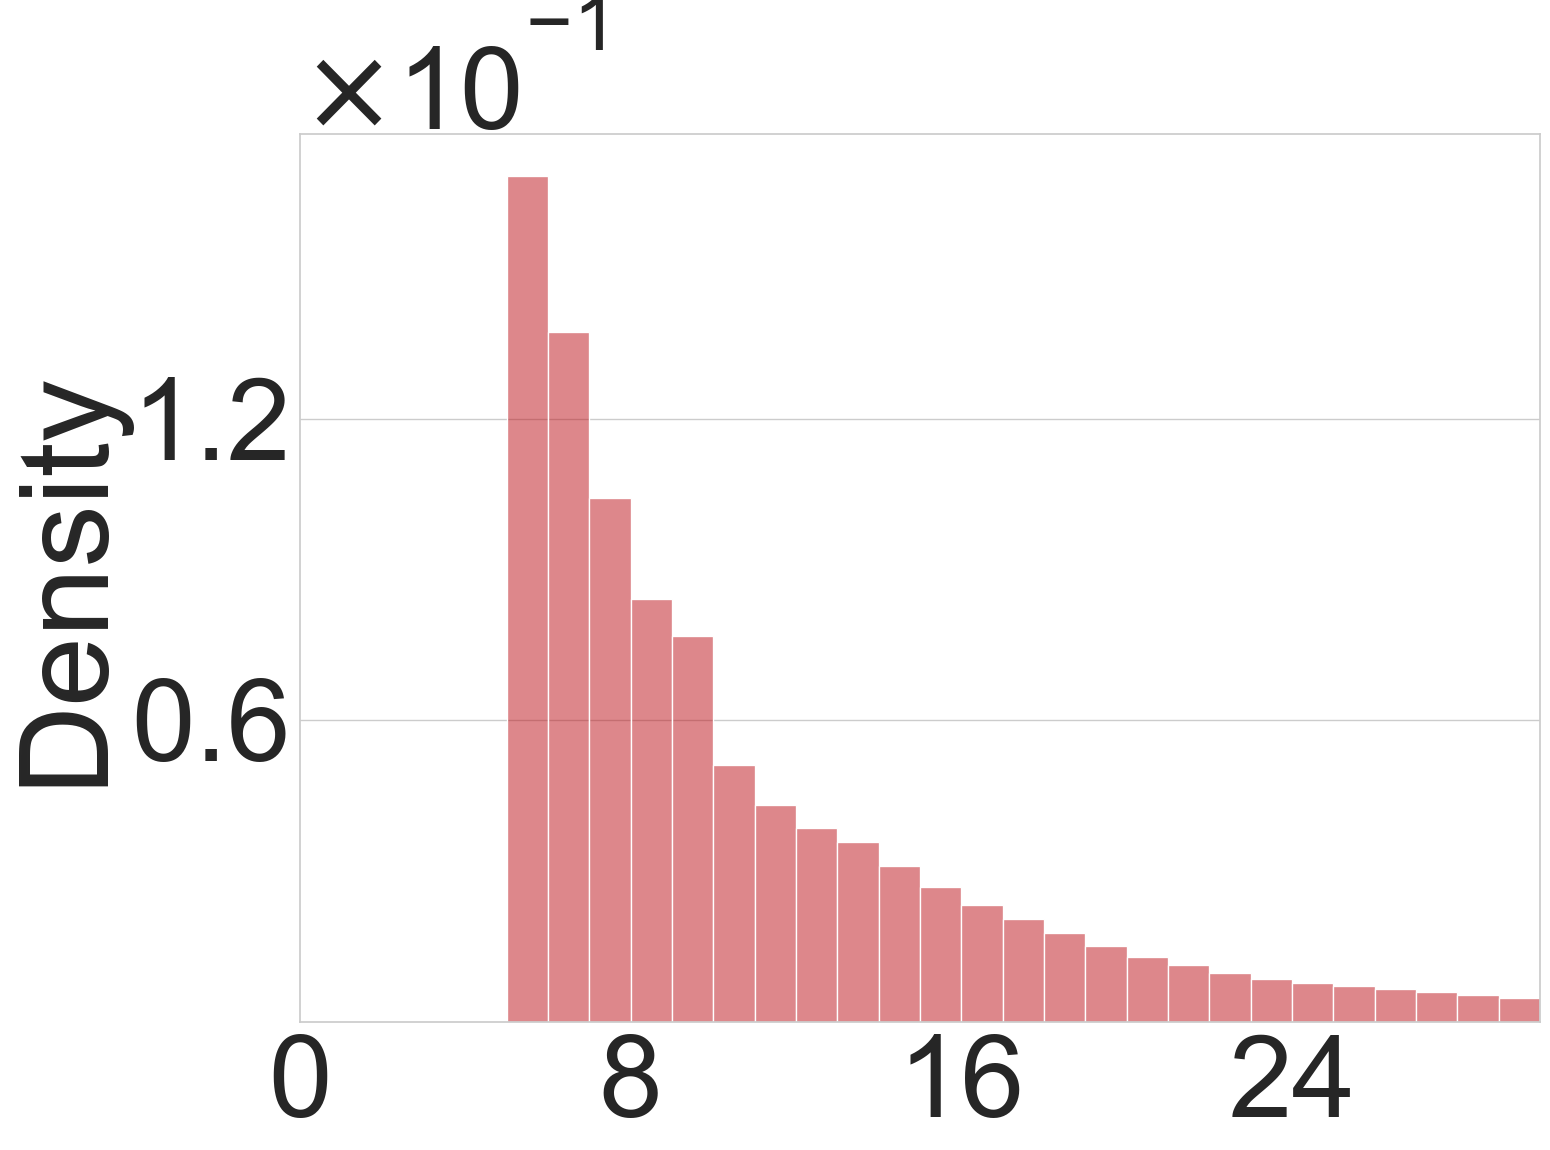

In [19]:
print(df_behaviors.select(N_INVIEW_ARTICLES).describe())
# =>
plot_histogram(
    df_behaviors.select(N_INVIEW_ARTICLES).collect(),
    x_max=30,
    num_xticks=4,
    num_yticks=3,
    fontsize=90,
    binwidth=1,
    column_name=N_INVIEW_ARTICLES,
    save_path=PLOT_PATH.joinpath(N_INVIEW_ARTICLES + f".png"),
)

## Front vs. Article page:

In [20]:
df_frontpage = (
    pl.concat([df_behaviors_train, df_behaviors_val])
    .select(DEFAULT_ARTICLE_ID_COL, DEFAULT_READ_TIME_COL)
    .filter(pl.col(DEFAULT_ARTICLE_ID_COL).is_null())
    .collect()
)
df_articlepage = (
    pl.concat([df_behaviors_train, df_behaviors_val])
    .select(DEFAULT_ARTICLE_ID_COL, DEFAULT_READ_TIME_COL)
    .filter(pl.col(DEFAULT_ARTICLE_ID_COL).is_not_null())
    .collect()
)
total_ = df_frontpage.shape[0] + df_articlepage.shape[0]

### Inviews - front- vs. article page:

/var/folders/zy/yr6l_n9d0hgf188_tf0sr0g80000gq/T/ipykernel_43247/2472249014.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


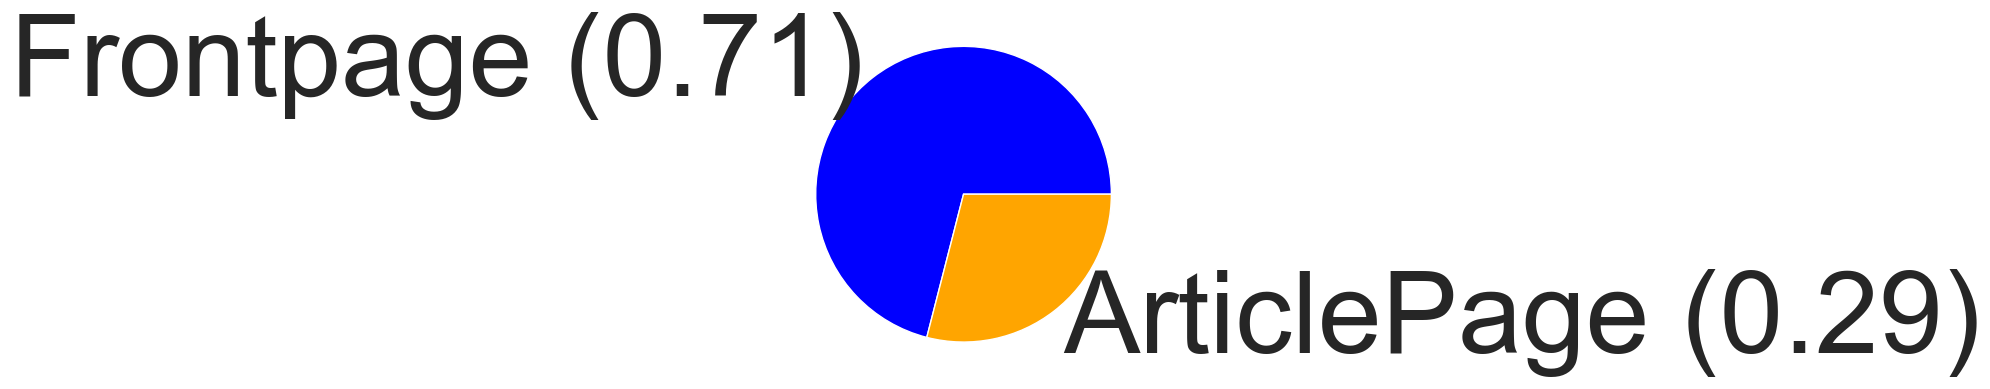

In [21]:
article_page_frac = round(df_articlepage.shape[0] / total_, 2)
frontpage_frac = round(1 - article_page_frac, 2)
#
sizes = [frontpage_frac, article_page_frac]
labels = f"Frontpage ({frontpage_frac})", f"ArticlePage ({article_page_frac})"
fig, ax = plt.subplots()
front_article_page = ax.pie(sizes, labels=labels, colors=["blue", "orange"])
plt.tight_layout()
save_figure(fig, save_path=PLOT_PATH.joinpath("front_article_page.png"))
plt.show()

### Inference / Publish Time

In [75]:
DIFF_TIME_COL = "timeDiff_hours"

lookup_pub = create_lookup_dict(
    df_articles, DEFAULT_ARTICLE_ID_COL, DEFAULT_ARTICLE_PUBLISHED_TIMESTAMP_COL
)
df_timeDiff = (
    df_behaviors.select(DEFAULT_IMPRESSION_TIMESTAMP_COL, DEFAULT_CLICKED_ARTICLES_COL)
    .explode(DEFAULT_CLICKED_ARTICLES_COL)
    .filter(pl.col(DEFAULT_CLICKED_ARTICLES_COL) > 0)
    .collect()
    .with_columns(
        (
            pl.col(DEFAULT_IMPRESSION_TIMESTAMP_COL)
            - pl.col(DEFAULT_CLICKED_ARTICLES_COL)
            .replace(lookup_pub)
            .cast(pl.Datetime())
        ).alias("timeDiff")
    )
    .with_columns(
        (pl.col("timeDiff").dt.total_seconds() // 60 // 60).alias(DIFF_TIME_COL)
    )
)
df_timeDiff.head(5)

shape: (5, 4)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ impression_time     ‚îÜ article_ids_clicked ‚îÜ timeDiff     ‚îÜ timeDiff_hours ‚îÇ
‚îÇ ---                 ‚îÜ ---                 ‚îÜ ---          ‚îÜ ---            ‚îÇ
‚îÇ datetime[Œºs]        ‚îÜ i32                 ‚îÜ duration[Œºs] ‚îÜ i64            ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2023-05-21 21:35:07 ‚îÜ 9775183             ‚îÜ 3h 58m 31s   ‚îÜ 3              ‚îÇ
‚îÇ 2023-05-21 21:32:33 ‚îÜ 9759966             ‚îÜ 2h 8m 11s    ‚îÜ 2              ‚îÇ
‚îÇ 2023-05-21 21:33:32 ‚îÜ 9774652             ‚îÜ 2h 41m       ‚îÜ 2              ‚îÇ
‚îÇ 2023-05-21 21:38:17 ‚îÜ 9775184             ‚îÜ 4h 17m 38s   ‚îÜ 4              ‚îÇ
‚îÇ 2023-05-21 21:36:02 ‚îÜ 9774648             ‚îÜ 4h 4m 15s    ‚îÜ 4              ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

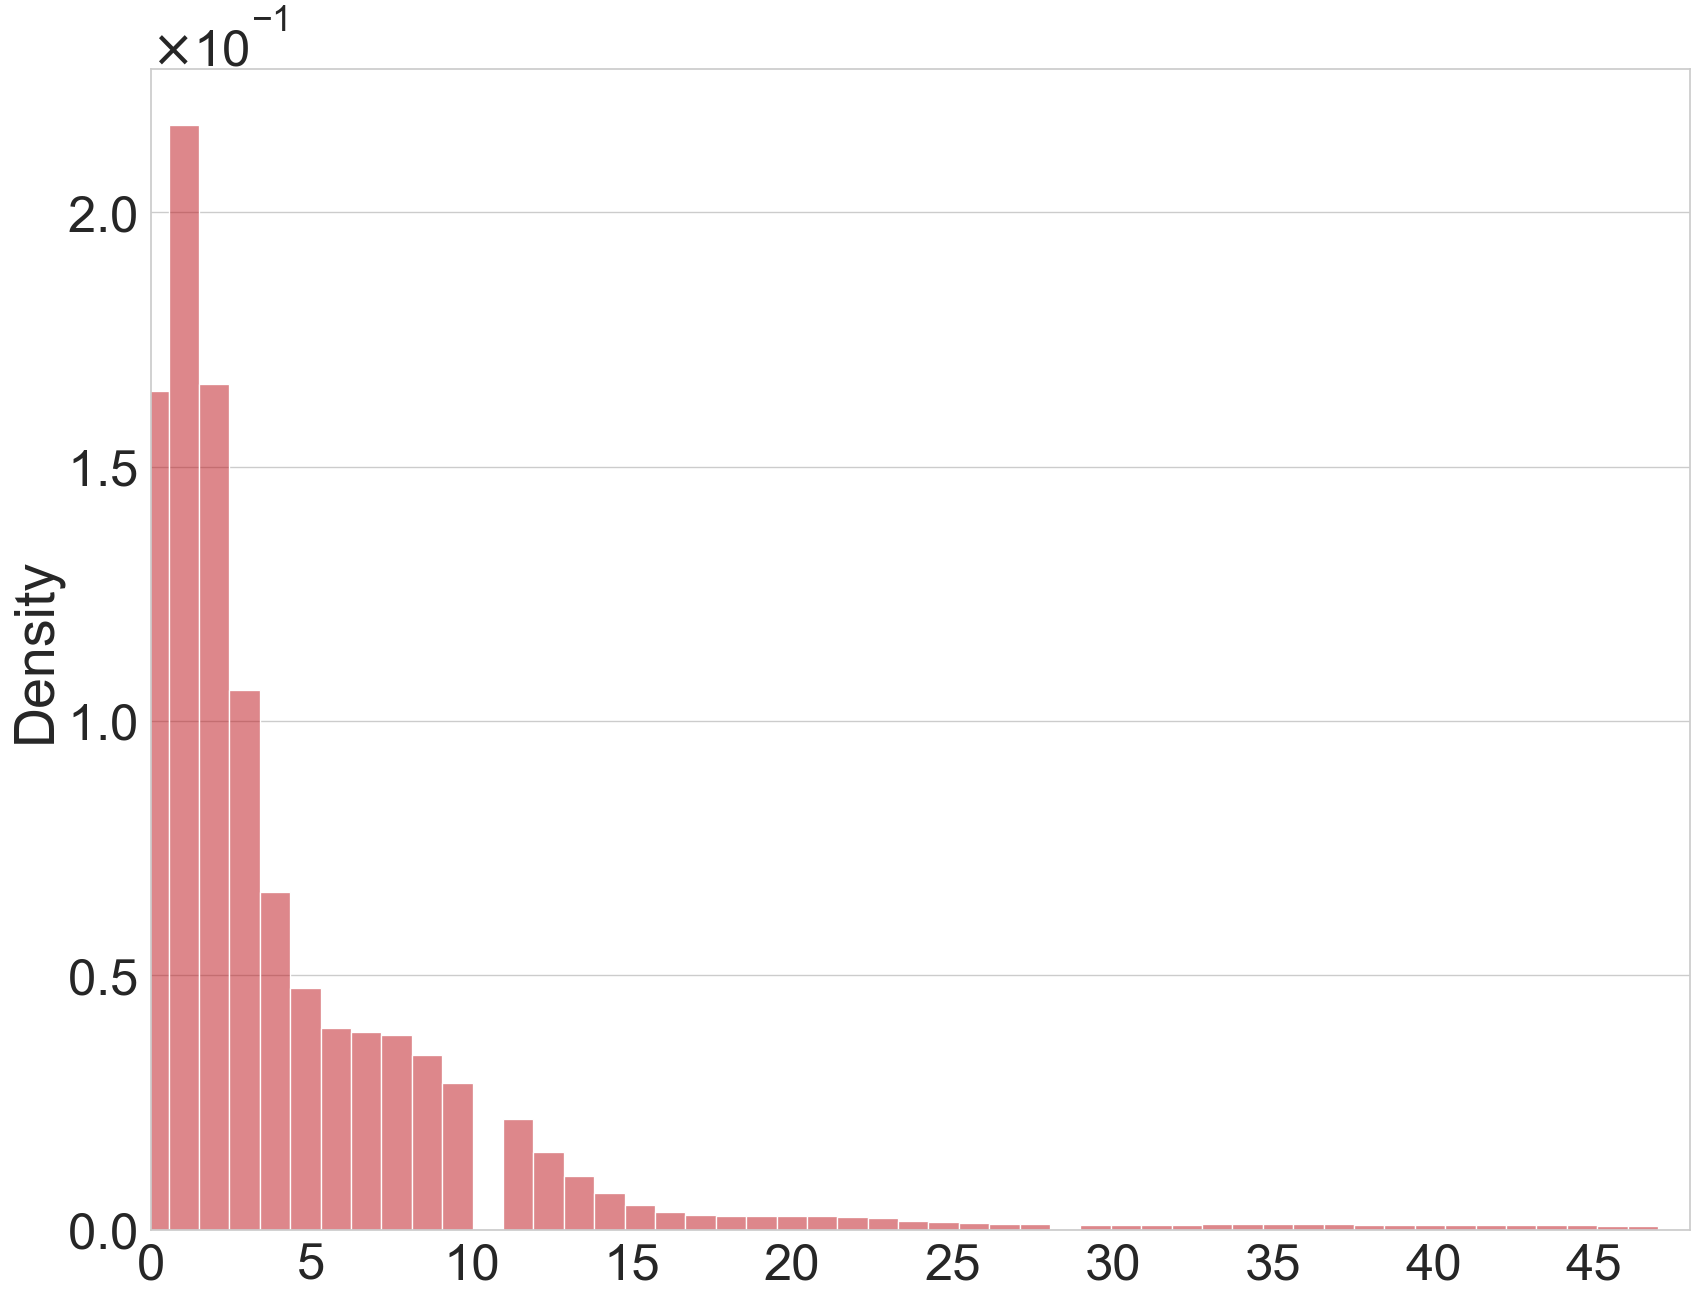

In [110]:
days_filter = 2 * 24

plot_histogram(
    df_timeDiff.filter(pl.col(DIFF_TIME_COL) < days_filter).select(DIFF_TIME_COL),
    column_name=DIFF_TIME_COL,
    x_max=days_filter,
    bins=days_filter * 2,
    fontsize=40,
    save_path=PLOT_PATH.joinpath("inference_clicked_timeDiff.png"),
)

### Readtime - front- vs. article page:

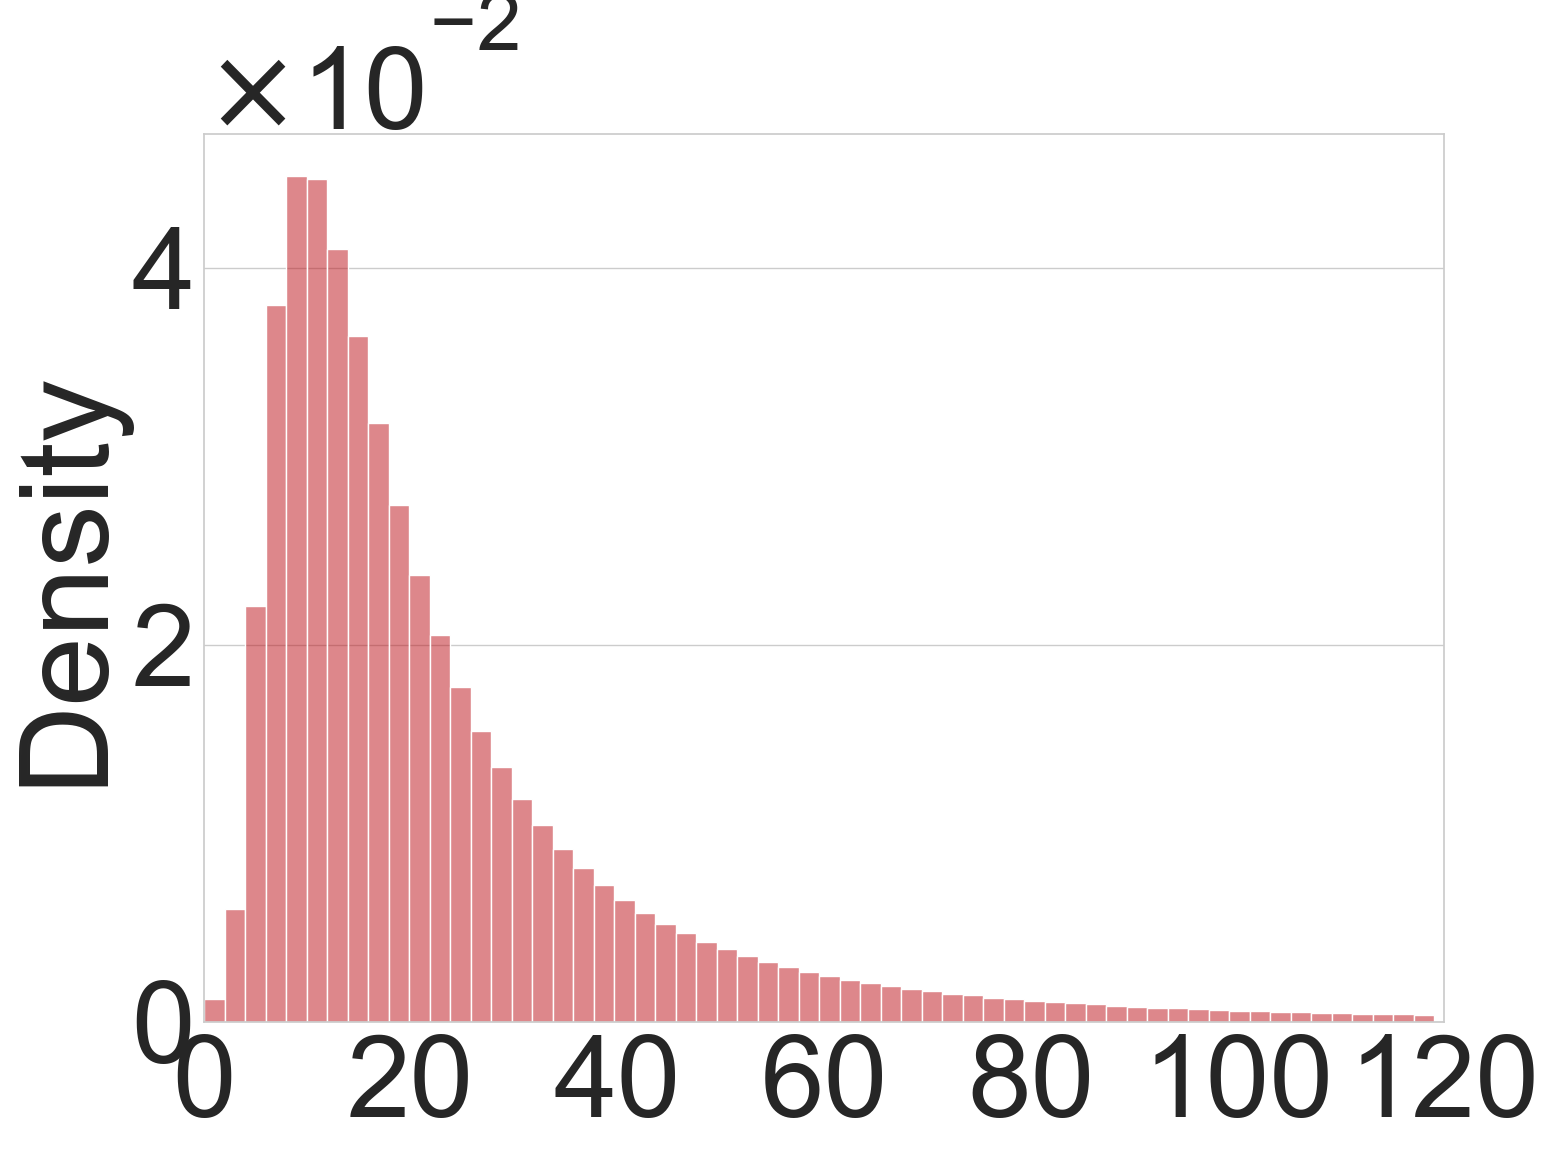

In [53]:
N_SHOW = 120
plot_histogram(
    df_frontpage.filter(pl.col(DEFAULT_READ_TIME_COL) < N_SHOW).select(
        DEFAULT_READ_TIME_COL
    ),
    column_name=DEFAULT_READ_TIME_COL,
    x_max=N_SHOW,
    bins=60,
    num_xticks=6,
    fontsize=90,
    save_path=PLOT_PATH.joinpath("front_read_time.png"),
)

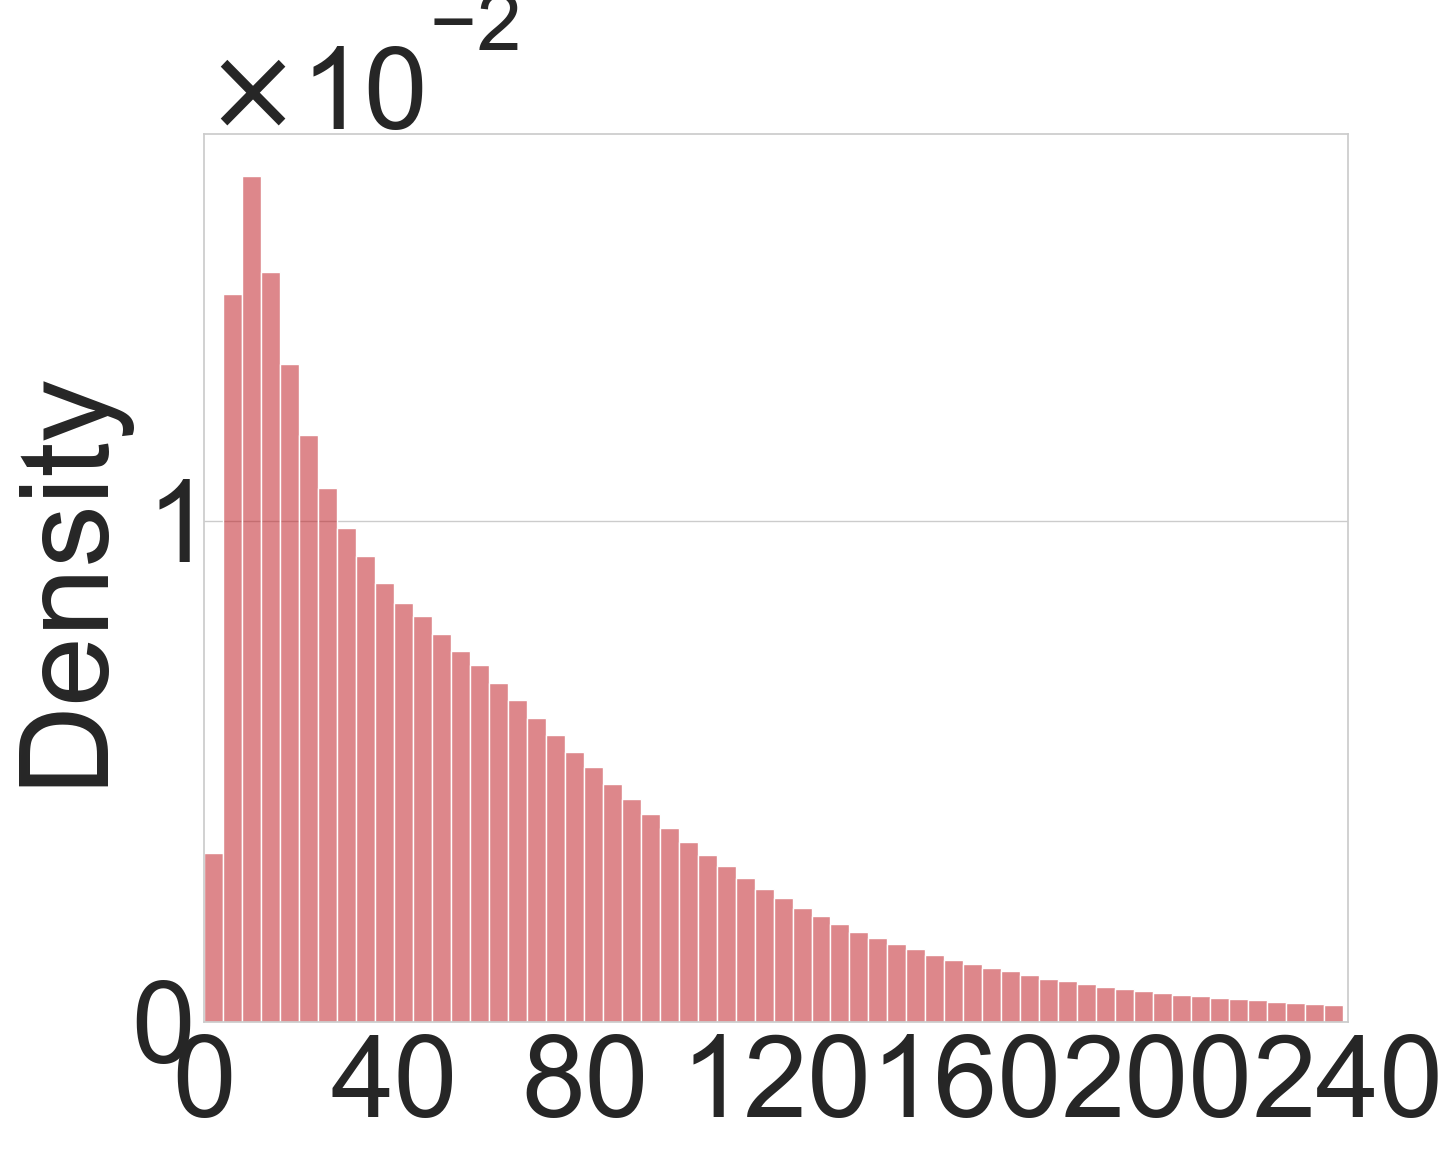

In [58]:
N_SHOW = 240
plot_histogram(
    df_articlepage.filter(pl.col(DEFAULT_READ_TIME_COL) < N_SHOW).select(
        DEFAULT_READ_TIME_COL
    ),
    column_name=DEFAULT_READ_TIME_COL,
    x_max=N_SHOW,
    bins=60,
    num_xticks=6,
    fontsize=90,
    save_path=PLOT_PATH.joinpath("article_read_time.png"),
)

## Article category distributions:

In [59]:
df_articles[DEFAULT_CATEGORY_STR_COL].value_counts(sort=True).head(15)

shape: (15, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ category_str  ‚îÜ count ‚îÇ
‚îÇ ---           ‚îÜ ---   ‚îÇ
‚îÇ str           ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ nyheder       ‚îÜ 27876 ‚îÇ
‚îÇ underholdning ‚îÜ 24909 ‚îÇ
‚îÇ krimi         ‚îÜ 22579 ‚îÇ
‚îÇ sport         ‚îÜ 18767 ‚îÇ
‚îÇ side9         ‚îÜ 4628  ‚îÇ
‚îÇ ‚Ä¶             ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ ferie         ‚îÜ 2396  ‚îÇ
‚îÇ biler         ‚îÜ 1964  ‚îÇ
‚îÇ play          ‚îÜ 1271  ‚îÇ
‚îÇ opinionen     ‚îÜ 580   ‚îÇ
‚îÇ vin           ‚îÜ 527   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [60]:
translate = {
    "nyheder": "NWS",  # news
    #
    "underholdning": "ENT",  # entertainment
    "musik": "ENT",  # entertainment
    #
    "krimi": "CRM",  # crime
    #
    "sport": "SPT",  # sports
    #
    "forbrug": "LFS",  # Lifestyle
    "biler": "LFS",  # Lifestyle
    "ferie": "LFS",  # Lifestyle
    "vin": "LFS",  # Lifestyle
    #
    "sex_og_samliv": "SRL",  # S&R
    #
    "nationen": "OPN",  # Opinion
    "opinionen": "OPN",  # Opinion
}
df_category = (
    df_articles[DEFAULT_CATEGORY_STR_COL]
    .replace(translate, default="MSC")
    .value_counts(sort=True)
    .with_columns(pl.col("count") / pl.col("count").sum())
)
df_category.with_columns(pl.col("count").cum_sum().name.suffix("_cum_sum"))

shape: (8, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ category_str ‚îÜ count    ‚îÜ count_cum_sum ‚îÇ
‚îÇ ---          ‚îÜ ---      ‚îÜ ---           ‚îÇ
‚îÇ str          ‚îÜ f64      ‚îÜ f64           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ ENT          ‚îÜ 0.227416 ‚îÜ 0.227416      ‚îÇ
‚îÇ NWS          ‚îÜ 0.222047 ‚îÜ 0.449463      ‚îÇ
‚îÇ CRM          ‚îÜ 0.179854 ‚îÜ 0.629316      ‚îÇ
‚îÇ SPT          ‚îÜ 0.149489 ‚îÜ 0.778805      ‚îÇ
‚îÇ MSC          ‚îÜ 0.084283 ‚îÜ 0.863089      ‚îÇ
‚îÇ LFS          ‚îÜ 0.073402 ‚îÜ 0.936491      ‚îÇ
‚îÇ SRL          ‚îÜ 0.032101 ‚îÜ 0.968592      ‚îÇ
‚îÇ OPN          ‚îÜ 0.031408 ‚îÜ 1.0           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

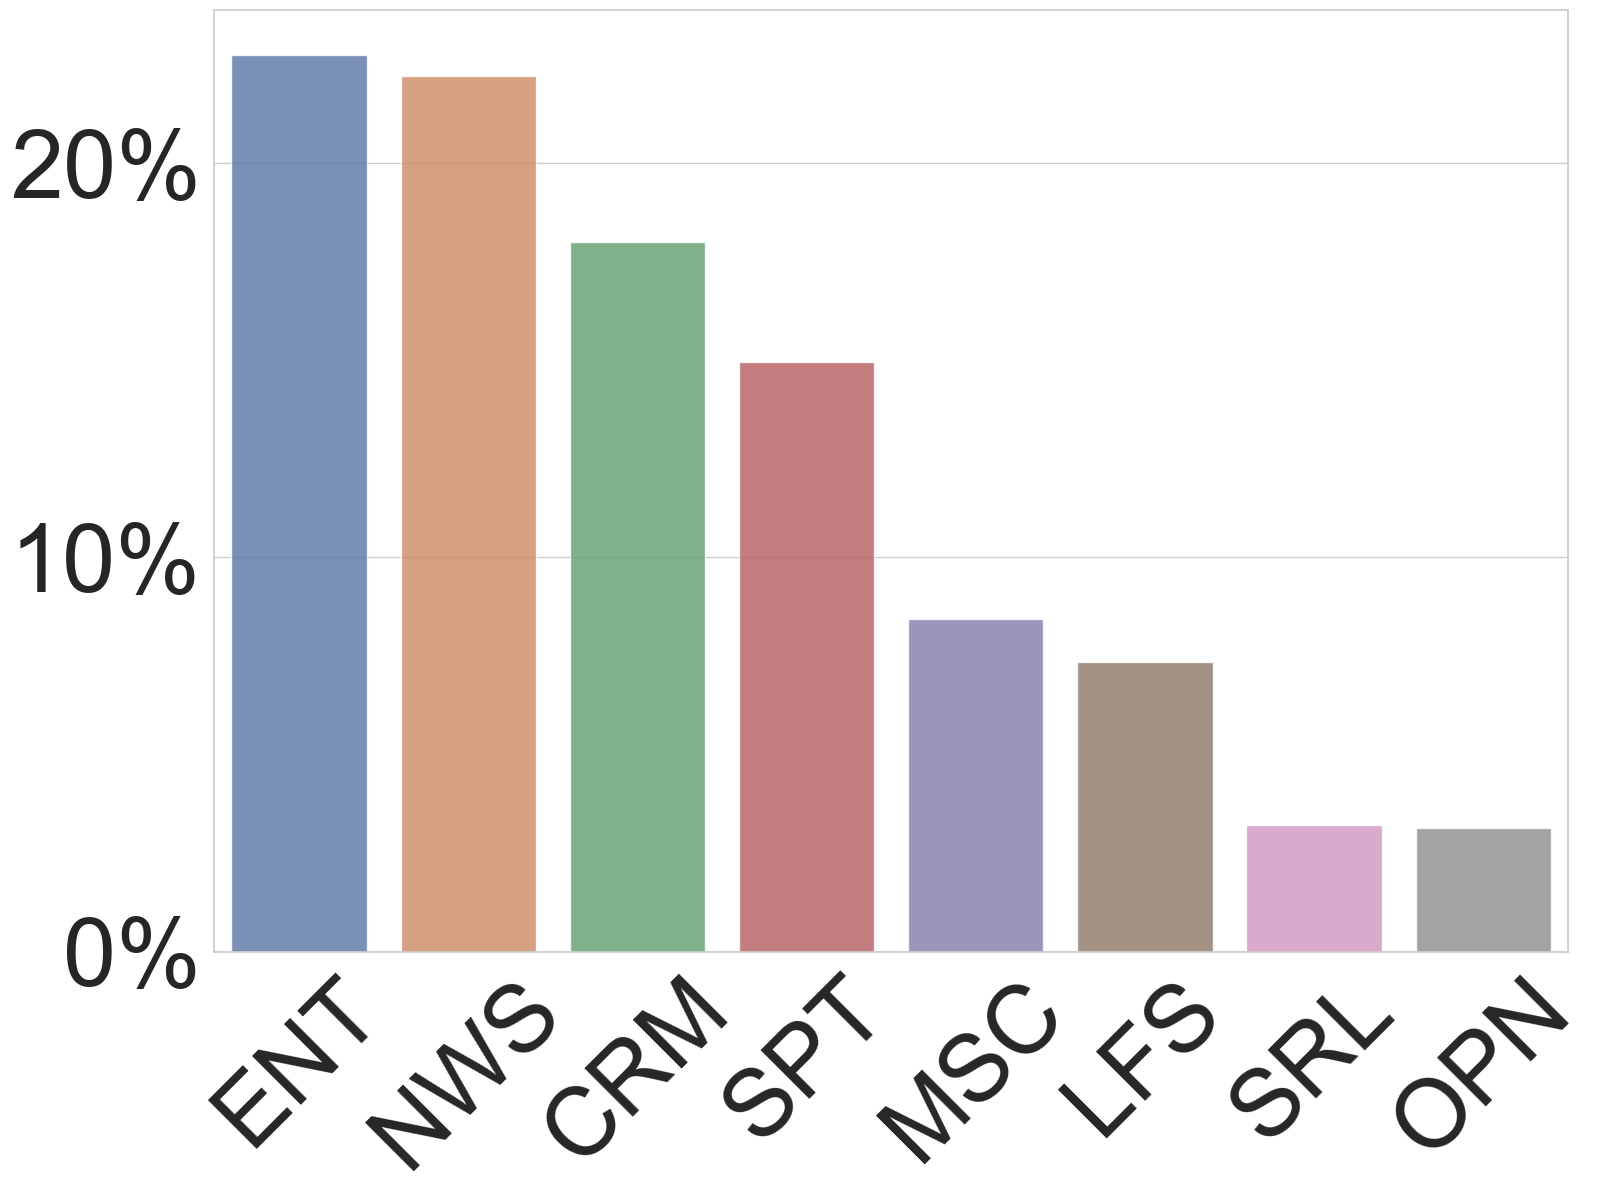

In [61]:
create_bar_plot(
    df_category.to_pandas(),
    x_col=DEFAULT_CATEGORY_STR_COL,
    y_col="count",
    y_as_percentage=True,
    colors=sns.color_palette(n_colors=df_category.shape[0]),
    fontsize=75,
    rotation=45,
    save_path=PLOT_PATH.joinpath(CATEGORY_DIST_NAME + ".png"),
)

## Candidate-list distribution

In [62]:
ba_aids = (
    df_behaviors_test_ba.filter(pl.col(DEFAULT_IS_BEYOND_ACCURACY_COL))
    .select(pl.col(DEFAULT_INVIEW_ARTICLES_COL).first().explode())
    .collect()
)[DEFAULT_INVIEW_ARTICLES_COL].to_list()

In [63]:
df_category_ba = (
    df_articles.filter(pl.col(DEFAULT_ARTICLE_ID_COL).is_in(ba_aids))[
        DEFAULT_CATEGORY_STR_COL
    ]
    .replace(translate, default="MSC")
    .value_counts(sort=True)
    .with_columns(pl.col("count") / pl.col("count").sum())
)
df_category_ba.with_columns(pl.col("count").cum_sum().name.suffix("_cum_sum"))

shape: (7, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ category_str ‚îÜ count ‚îÜ count_cum_sum ‚îÇ
‚îÇ ---          ‚îÜ ---   ‚îÜ ---           ‚îÇ
‚îÇ str          ‚îÜ f64   ‚îÜ f64           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ MSC          ‚îÜ 0.42  ‚îÜ 0.42          ‚îÇ
‚îÇ SPT          ‚îÜ 0.168 ‚îÜ 0.588         ‚îÇ
‚îÇ NWS          ‚îÜ 0.16  ‚îÜ 0.748         ‚îÇ
‚îÇ ENT          ‚îÜ 0.12  ‚îÜ 0.868         ‚îÇ
‚îÇ CRM          ‚îÜ 0.096 ‚îÜ 0.964         ‚îÇ
‚îÇ OPN          ‚îÜ 0.024 ‚îÜ 0.988         ‚îÇ
‚îÇ LFS          ‚îÜ 0.012 ‚îÜ 1.0           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

/var/folders/2l/k442jfhs2fd_3t2f7snmr_4w0000gq/T/ipykernel_1397/1122993486.py:73: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  ax = sns.barplot(


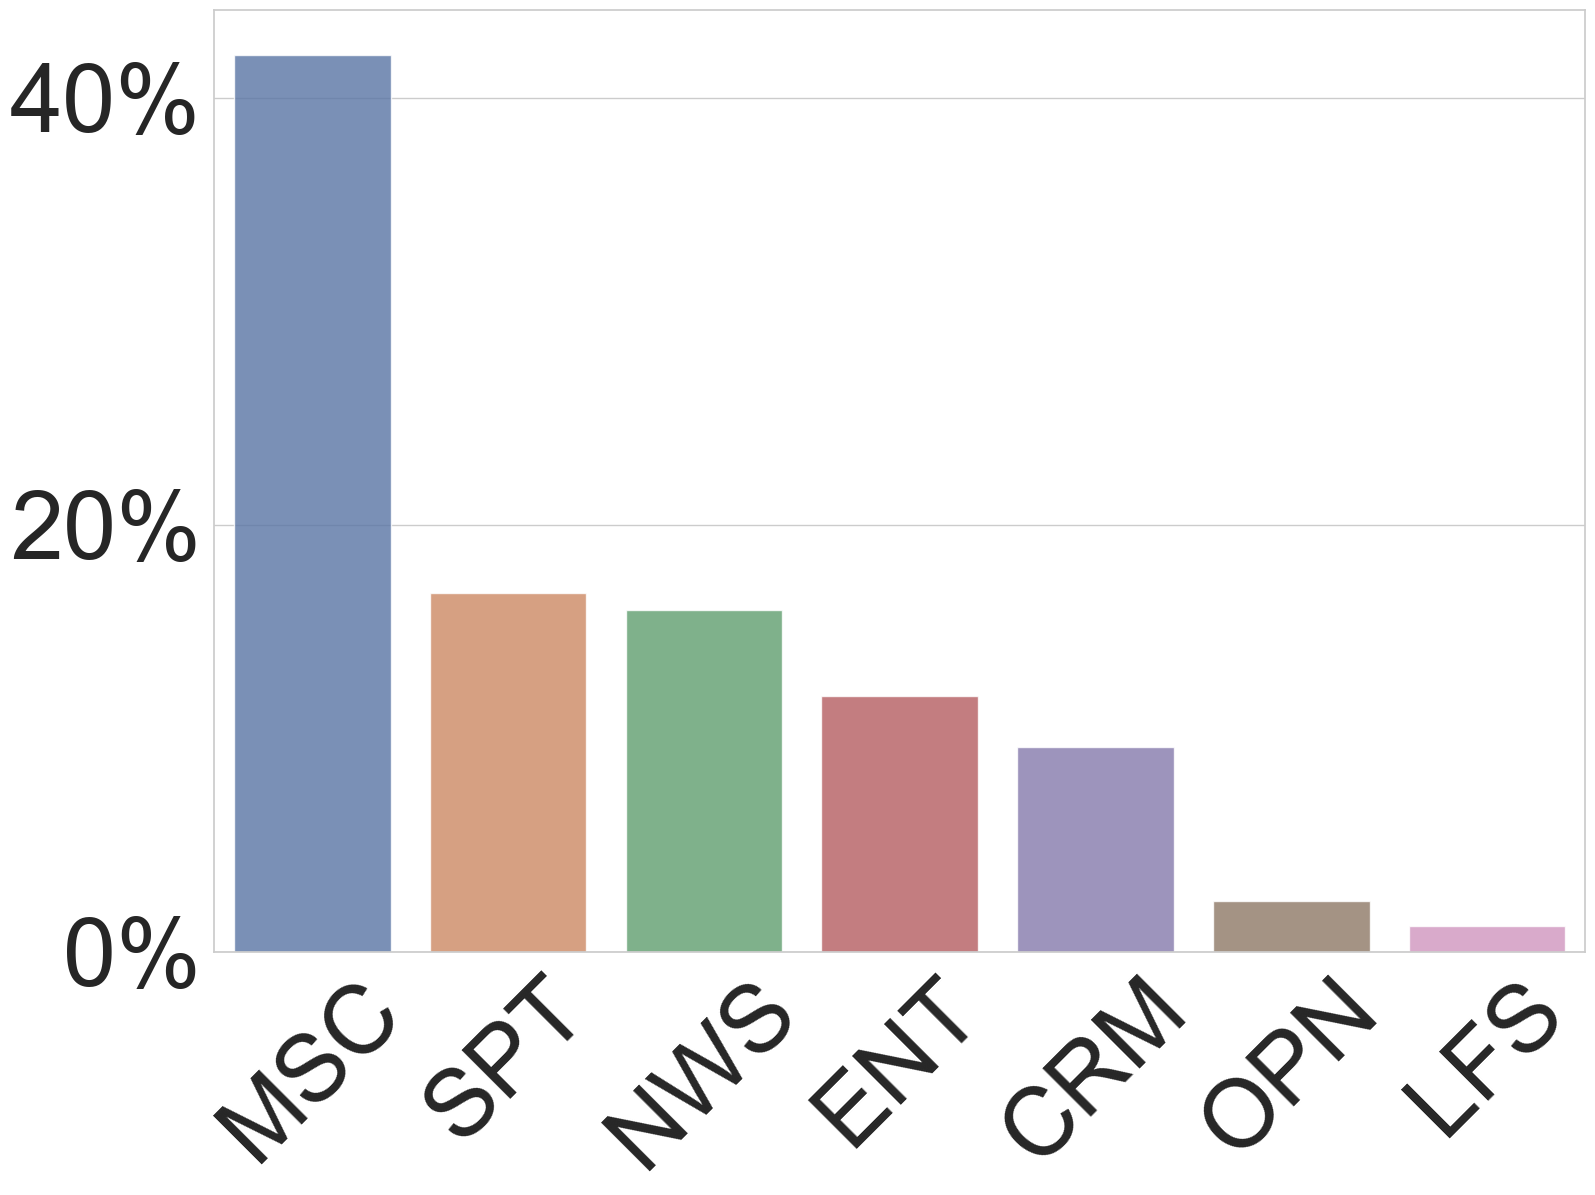

In [64]:
create_bar_plot(
    df_category_ba.to_pandas(),
    x_col=DEFAULT_CATEGORY_STR_COL,
    y_col="count",
    y_as_percentage=True,
    colors=sns.color_palette(n_colors=df_category.shape[0]),
    fontsize=75,
    rotation=45,
    save_path=PLOT_PATH.joinpath(CATEGORY_DIST_NAME + "_ba" + ".png"),
)

# DONE üöÄ